In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%run ./utils.ipynb

In [3]:
num_of_bits = 1000000                                               
step = 0.05 #Samples per pulse of duration 1
T=1 # pulse period
# generate the binary symbols (1)
input_bitstream = np.random.randint(0,2,num_of_bits)
# generate the binary signal (2)
g_t = binarycode_to_signal(input_bitstream, step)
# plot BER VS. E/No for each filter
E_Nₒ=np.arange(-10, 21, 1)    # E_Nₒ range
Nₒ = 1/(10**(E_Nₒ/10))
sigma = np.sqrt(Nₒ/2) # the range of sigma.

# Filter 1:
filter1_BER, filter1_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))
# Filter 2:
filter2_BER, filter2_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))
# Filter 3:
filter3_BER, filter3_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))

for i in range(len(sigma)):
    # generate the noise
    s_t = add_AWGN_noise(g_t,len(g_t), sigma[i])
    # apply the filter to the signal (4)
    y_t_1 = receive_filter(s_t,1, step)
    y_t_2 = receive_filter(s_t,2, step)
    y_t_3 = receive_filter(s_t,3, step)
    # sample the filtered signal (5)
    sampling_period = int(T/step)
    y_iT_1 = sampling(sampling_period, y_t_1,num_of_bits)  
    y_iT_2 = sampling(sampling_period, y_t_2,num_of_bits) 
    y_iT_3 = sampling(sampling_period, y_t_3,num_of_bits)
    # decode the samples (6)
    λ = 0      # due to Assumation                                             
    bitstream_output_1 = signal_to_binarycode(y_iT_1, λ)
    bitstream_output_2 = signal_to_binarycode(y_iT_2, λ)
    bitstream_output_3 = signal_to_binarycode(y_iT_3, λ)
    filter1_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_1)
    filter1_BER_th[i] = calc_theoretical_BER(1/sigma[i])
    filter2_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_2)
    filter2_BER_th[i] = calc_theoretical_BER(1/sigma[i])
    filter3_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_3)
    filter3_BER_th[i] = calc_theoretical_BER(np.sqrt(3)/2*1/sigma[i])

num_of_bits = 1000000                                               
step = 0.05 #Samples per pulse of duration 1
T=1 # pulse period
# generate the binary symbols (1)
input_bitstream = np.random.randint(0,2,num_of_bits)
# generate the binary signal (2)
g_t = binarycode_to_signal(input_bitstream, step)
# plot BER VS. E/No for each filter
E_Nₒ=np.arange(-10, 21, 1)    # E_Nₒ range
Nₒ = 1/(10**(E_Nₒ/10))
sigma = np.sqrt(Nₒ/2) # the range of sigma.

# Filter 1:
filter1_BER, filter1_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))
# Filter 2:
filter2_BER, filter2_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))
# Filter 3:
filter3_BER, filter3_BER_th = np.zeros(len(sigma)), np.zeros(len(sigma))

for i in range(len(sigma)):
    # generate the noise
    s_t = add_AWGN_noise(g_t,len(g_t), sigma[i])
    # apply the filter to the signal (4)
    y_t_1 = receive_filter(s_t,1, step)
    y_t_2 = receive_filter(s_t,2, step)
    y_t_3 = receive_filter(s_t,3, step)
    # sample the filtered signal (5)
    sampling_period = int(T/step)
    y_iT_1 = sampling(sampling_period, y_t_1,num_of_bits)  
    y_iT_2 = sampling(sampling_period, y_t_2,num_of_bits) 
    y_iT_3 = sampling(sampling_period, y_t_3,num_of_bits)
    # decode the samples (6)
    λ = 0      # due to Assumation                                             
    bitstream_output_1 = signal_to_binarycode(y_iT_1, λ)
    bitstream_output_2 = signal_to_binarycode(y_iT_2, λ)
    bitstream_output_3 = signal_to_binarycode(y_iT_3, λ)
    filter1_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_1)
    filter1_BER_th[i] = calc_theoretical_BER(1/sigma[i])
    filter2_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_2)
    filter2_BER_th[i] = calc_theoretical_BER(1/sigma[i])
    filter3_BER[i] = calc_simulated_BER(input_bitstream,bitstream_output_3)
    filter3_BER_th[i] = calc_theoretical_BER(np.sqrt(3)/2*1/sigma[i])



 


 


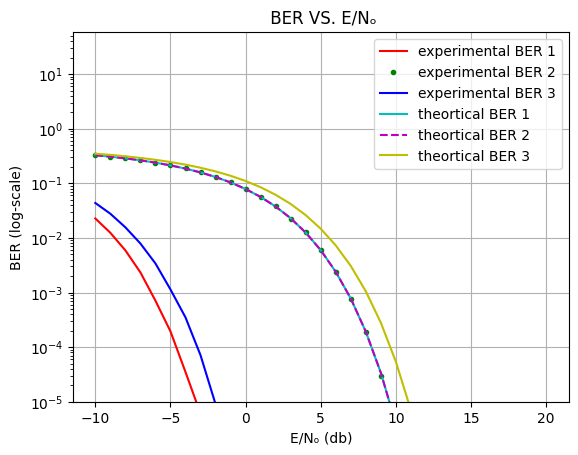

In [4]:
# # plt.show()
E_Nₒ=np.arange(-10, 21, 1) 
plt.semilogy(E_Nₒ, filter1_BER, 'r',label = "experimental BER 1")
plt.semilogy(E_Nₒ, filter2_BER, 'g.',label = "experimental BER 2")
plt.semilogy(E_Nₒ, filter3_BER, 'b',label = "experimental BER 3")
plt.semilogy(E_Nₒ, filter1_BER_th, 'c',label = "theortical BER 1")
plt.semilogy(E_Nₒ, filter2_BER_th, 'm--',label = "theortical BER 2")
plt.semilogy(E_Nₒ, filter3_BER_th, 'y',label = "theortical BER 3")

plt.xlabel('E/Nₒ (db)')
plt.ylabel('BER (log-scale)')
plt.title(' BER VS. E/Nₒ')
plt.ylim(10**(-5))
plt.legend()
plt.grid()
plt.show()
